# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="

In [6]:
print("Beginning Data Retrieval")
print ("-----------------------------")

record_count = 1
set_count = 1
city_data = []

for i,city in enumerate(cities):
    if(i%50==0 and i>=50):
        record_count=1
        set_count+=1
#         set_count = set_count + 1
    print(f"Processing record {record_count} of set {set_count} | {city} ")
    record_count += 1
    city_url=url+city
    try:
        city_weather=requests.get(city_url).json()
        city_data.append({
            "City":city,
            "Lat":city_weather["coord"]["lat"],
            "Lon":city_weather["coord"]["lon"],
            "Max Temp":city_weather["main"]["temp_max"],
            "Humidity":city_weather["main"]["humidity"],
            "Cloudiness":city_weather["clouds"]["all"],
            "Wind Speed":city_weather["wind"]["speed"],
            "Date":city_weather["dt"]
            
        })
    except:
        print("City not found.  Skipping...")
        pass
    
print("--------------")   
print("Data retrieval compleated.")
print ("-------------")


Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | milkovo 
Processing record 2 of set 1 | bethel 
Processing record 3 of set 1 | williamsport 
Processing record 4 of set 1 | leningradskiy 
Processing record 5 of set 1 | hithadhoo 
Processing record 6 of set 1 | port alfred 
Processing record 7 of set 1 | hermanus 
Processing record 8 of set 1 | ribeira grande 
Processing record 9 of set 1 | amazar 
Processing record 10 of set 1 | atuona 
Processing record 11 of set 1 | busselton 
Processing record 12 of set 1 | punta arenas 
Processing record 13 of set 1 | cape town 
Processing record 14 of set 1 | butaritari 
Processing record 15 of set 1 | makakilo city 
Processing record 16 of set 1 | aklavik 
Processing record 17 of set 1 | ushuaia 
Processing record 18 of set 1 | rikitea 
Processing record 19 of set 1 | new norfolk 
Processing record 20 of set 1 | hilo 
Processing record 21 of set 1 | taolanaro 
City not found.  Skipping...
Processing record 22 

Processing record 31 of set 4 | cape canaveral 
Processing record 32 of set 4 | yumen 
Processing record 33 of set 4 | longyearbyen 
Processing record 34 of set 4 | krk 
Processing record 35 of set 4 | saskylakh 
Processing record 36 of set 4 | torbay 
Processing record 37 of set 4 | zyrardow 
Processing record 38 of set 4 | cumaribo 
City not found.  Skipping...
Processing record 39 of set 4 | toyo 
Processing record 40 of set 4 | isangel 
Processing record 41 of set 4 | lewiston 
Processing record 42 of set 4 | thompson 
Processing record 43 of set 4 | hammerfest 
Processing record 44 of set 4 | maralal 
Processing record 45 of set 4 | lagoa 
Processing record 46 of set 4 | yar-sale 
Processing record 47 of set 4 | kyzyl-suu 
Processing record 48 of set 4 | vernon 
Processing record 49 of set 4 | margate 
Processing record 50 of set 4 | biak 
Processing record 1 of set 5 | hvide sande 
Processing record 2 of set 5 | bulgan 
Processing record 3 of set 5 | ibra 
Processing record 4 of 

Processing record 18 of set 8 | seoni 
Processing record 19 of set 8 | ariquemes 
Processing record 20 of set 8 | nelson bay 
Processing record 21 of set 8 | tucuma 
Processing record 22 of set 8 | whitianga 
Processing record 23 of set 8 | marsa matruh 
Processing record 24 of set 8 | okato 
Processing record 25 of set 8 | padang 
Processing record 26 of set 8 | veraval 
Processing record 27 of set 8 | lobito 
Processing record 28 of set 8 | yeniseysk 
Processing record 29 of set 8 | beloha 
Processing record 30 of set 8 | kuhdasht 
Processing record 31 of set 8 | port-gentil 
Processing record 32 of set 8 | turochak 
Processing record 33 of set 8 | mariahu 
Processing record 34 of set 8 | ust-kamchatsk 
City not found.  Skipping...
Processing record 35 of set 8 | slobodskoy 
Processing record 36 of set 8 | darnah 
Processing record 37 of set 8 | cherskiy 
Processing record 38 of set 8 | sovetskaya gavan 
Processing record 39 of set 8 | grand gaube 
Processing record 40 of set 8 | aca

Processing record 3 of set 12 | samalaeulu 
City not found.  Skipping...
Processing record 4 of set 12 | tomohon 
Processing record 5 of set 12 | bengkulu 
Processing record 6 of set 12 | inirida 
Processing record 7 of set 12 | rolim de moura 
City not found.  Skipping...
Processing record 8 of set 12 | lotofaga 
Processing record 9 of set 12 | monroe 
Processing record 10 of set 12 | taoudenni 
Processing record 11 of set 12 | ukiah 
Processing record 12 of set 12 | mancio lima 
Processing record 13 of set 12 | mount isa 
Processing record 14 of set 12 | grand-lahou 
Processing record 15 of set 12 | nome 
Processing record 16 of set 12 | vostok 
Processing record 17 of set 12 | likasi 
Processing record 18 of set 12 | viedma 
Processing record 19 of set 12 | ashtabula 
Processing record 20 of set 12 | vila velha 
Processing record 21 of set 12 | marzuq 
Processing record 22 of set 12 | atambua 
Processing record 23 of set 12 | kalmunai 
Processing record 24 of set 12 | yinchuan 
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cityD=pd.DataFrame(city_data)
cityD.to_csv(output_data_file)
cityD.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,milkovo,54.72,158.62,20.50,93,100,2.80,1586454771
1,bethel,41.37,-73.41,55.99,87,90,10.29,1586454771
2,williamsport,41.24,-77.00,55.40,61,75,26.40,1586454771
3,leningradskiy,69.38,178.42,-7.82,90,44,5.97,1586454771
4,hithadhoo,-0.60,73.08,84.94,64,64,4.90,1586454771


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

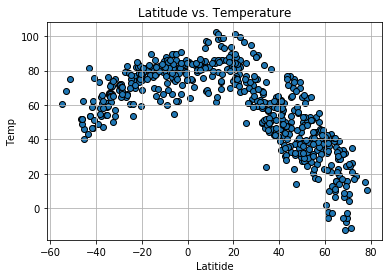

In [8]:
plt.scatter(cityD.Lat,cityD["Max Temp"],edgecolors="black")
plt.grid("both")
plt.title("Latitude vs. Temperature")
plt.ylabel("Temp")
plt.xlabel("Latitide")
plt.savefig("output_data/Latitude_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

In [22]:
cityD.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,64.50,-165.41,-0.40,77,90,17.22,1580591349
1,atuona,-9.80,-139.03,81.57,75,0,18.92,1580591350
2,lebu,-37.62,-73.65,65.89,80,93,6.98,1580591350
3,natal,-5.79,-35.21,82.40,83,75,9.17,1580591233
4,khatanga,71.97,102.50,-29.36,96,55,10.80,1580591350


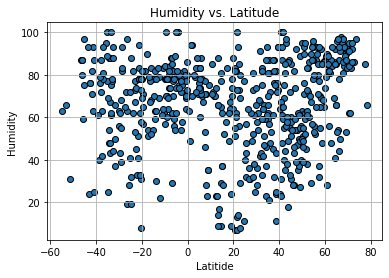

In [9]:
plt.scatter(cityD.Lat,cityD["Humidity"],edgecolors="black")
plt.grid("both")
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitide")
plt.savefig("output_data/Latitude_vs_Temp.png")
plt.show()

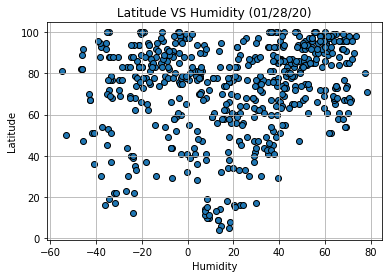

In [60]:
plt.scatter(x=cityD["Lat"], y =cityD.Humidity, edgecolors="black")
plt.title("Latitude VS Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid("both")
plt.savefig("output_data/Latitude_vs_Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

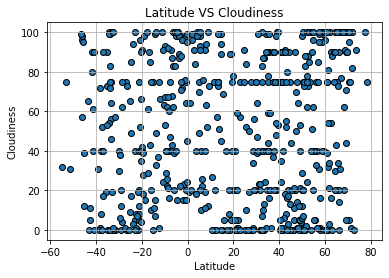

In [10]:
plt.scatter(x=cityD["Lat"], y =cityD.Cloudiness, edgecolors="black")
plt.title("Latitude VS Cloudiness" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid("both")
plt.savefig("output_data/Latitude_vs_Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

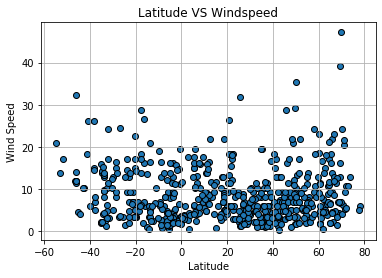

In [36]:
plt.scatter(cityD.Lat,cityD["Wind Speed"],edgecolors="black")

#plt.scatter(x=cityD["Lat"], y =cityD."Wind Speed" edgecolors="black")
plt.title("Latitude VS Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid("both")
plt.savefig("output_data/Latitude_vs_Wind Speed")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [39]:
# Create Northern and Southern Hemisphere DataFrames
cityD.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,64.50,-165.41,-0.40,77,90,17.22,1580591349
1,atuona,-9.80,-139.03,81.57,75,0,18.92,1580591350
2,lebu,-37.62,-73.65,65.89,80,93,6.98,1580591350
3,natal,-5.79,-35.21,82.40,83,75,9.17,1580591233
4,khatanga,71.97,102.50,-29.36,96,55,10.80,1580591350


In [12]:
Northern = cityD[(cityD["Lat"]>0)]
Northern.head()
            
            
            #promising = data[(data['Drug Regimen'] == 'Capomulin') | (data['Drug Regimen'] == 'Ramicane') | \
                 #(data['Drug Regimen'] == 'Infubinol') | (data['Drug Regimen'] == 'Ceftamin')]



,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,milkovo,54.72,158.62,20.50,93,100,2.80,1586454771
1,bethel,41.37,-73.41,55.99,87,90,10.29,1586454771
2,williamsport,41.24,-77.00,55.40,61,75,26.40,1586454771
3,leningradskiy,69.38,178.42,-7.82,90,44,5.97,1586454771
7,ribeira grande,38.52,-28.70,64.40,82,20,4.70,1586454772


In [13]:
Southern = cityD[(cityD["Lat"]< 0)]
Southern.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
4,hithadhoo,-0.60,73.08,84.94,64,64,4.90,1586454771
5,port alfred,-33.59,26.89,70.72,75,56,21.94,1586454771
6,hermanus,-34.42,19.23,66.00,88,100,3.69,1586454771
9,atuona,-9.80,-139.03,82.56,78,93,14.79,1586454772
10,busselton,-33.65,115.33,72.00,61,64,7.63,1586454772


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

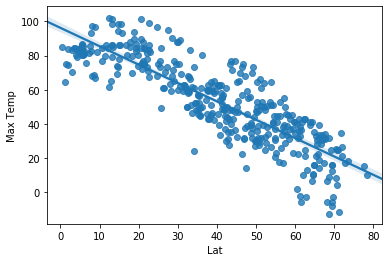

In [21]:
# seaborn linear regression
sns.regplot(x=Northern["Lat"], y=Northern["Max Temp"], data=Northern);

Analysis:
There is a very strong correlation between tempature and lattitude in the Northern Hemisphere. The greater the lattitude the lower the tempature and vice versa.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

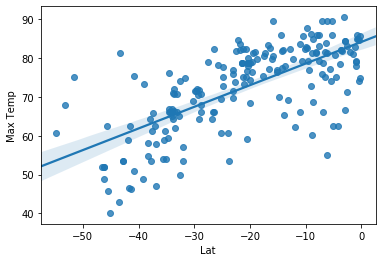

In [23]:
# seaborn linear regression

sns.regplot(x=Southern["Lat"], y=Southern["Max Temp"], data=Southern);

There is also a strong correlation in the Southern Hemisphere between the latitude and tempature. The greater the lattitude the higer the tempature and vice versa.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

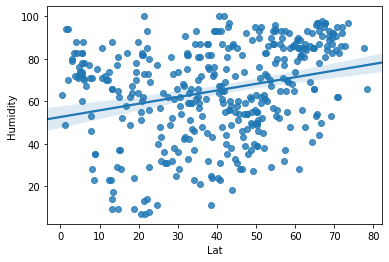

In [24]:
#seaborn linear regression
sns.regplot(x=Northern["Lat"], y=Northern["Humidity"], data=Northern);

There is a slight but not strong correlation between lattitude and humidity in the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

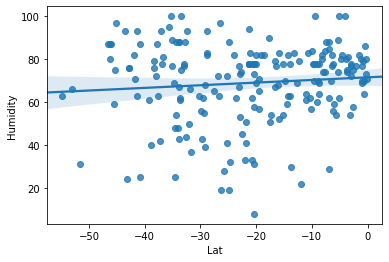

In [25]:
# seaborn linear regression

sns.regplot(x=Southern["Lat"], y=Southern["Humidity"], data=Southern);

There is not a correlation between humidity and lattitude in the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

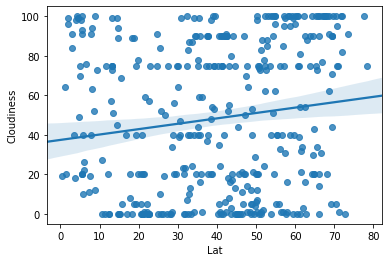

In [35]:
# seaborn linear regression
sns.regplot(x=Northern["Lat"], y=Northern["Cloudiness"], data=Northern);

There is a very slight correlation between cloudiness and lattitude in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

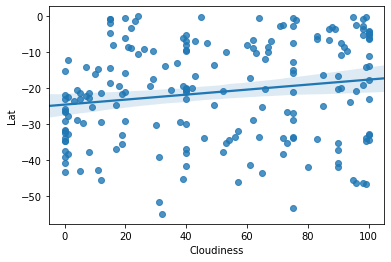

In [31]:
# seaborn linear regression

sns.regplot(x=Southern["Cloudiness"], y=Southern["Lat"], data=Southern);

There is an extremely slight correlation between cloudiness and lattitude in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

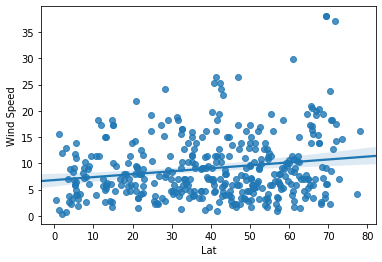

In [36]:
# seaborn linear regression

sns.regplot(x=Northern["Lat"], y=Northern["Wind Speed"], data=Northern);

There is no correlation between wind speed and lattitude in the Southern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

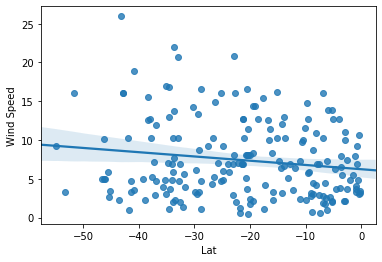

In [34]:
# seaborn linear regression

sns.regplot(x=Southern["Lat"], y=Southern["Wind Speed"], data=Southern);

There is an extremly slight correlation between wind speed and lattitude in the Southern Hemisphere. 

 Observations:
 1.